# Project: Investigate a Dataset - [FBI Gun Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

I am investigating the data from the FBI's National Instant Criminal Background Check System. The NICS is used to determine whether a prospective buyer is eligible to buy firearms or explosives.The data has been supplemented with state level data from census.gov.

List of all column names in NICS table
1. month 2. state 3. permit 4. permit_recheck 5. handgun 6. long_gun 
7. other  8. multiple 9. admin 10. prepawn_handgun 11. prepawn_long_gun
12. prepawn_other 13. redemption_handgun 14. redemption_long_gun
15. redemption_other 16. returned_handgun 17. returned_long_gun
18. returned_other 19. rentals_handgun 20. rentals_long_gun
21. private_sale_handgun 22. private_sale_long_gun 23. private_sale_other
24. return_to_seller_handgun 25. return_to_seller_long_gun 26. return_to_seller_other 27. totals

List of all column names in census table

0   Fact          1   Fact Note      2   Alabama        3   Alaska         4   Arizona         
5   Arkansas      6   California     7   Colorado       8   Connecticut    9   Delaware      
10  Florida       11  Georgia        12  Hawaii         13  Idaho          14  Illinois        
15  Indiana       16  Iowa           17  Kansas         18  Kentucky       19  Louisiana       
20  Maine         21  Maryland       22  Massachusetts  23  Michigan       24  Minnesota       
25  Mississippi   26  Missouri       27  Montana        28  Nebraska       29  Nevada          
30  New Hampshire 31  New Jersey     32  New Mexico     33  New York       34  North Carolina  
35  North Dakota  36  Ohio           37  Oklahoma       38  Oregon         39  Pennsylvania    
40  Rhode Island  41  South Carolina 42  South Dakota   43  Tennessee      44  Texas           
45  Utah          46  Vermont        47  Virginia       48  Washington     49  West Virginia   
50  Wisconsin     51  Wyoming 

### Tables Discussion
1. Month column in NICS table runs from november 1998 to september 2017 but checking the fact row in census data, population estimates are only provided for 2010 and 2016. Therefore, there is a need to derive another table from NICS table that would contain 2010 and 2016 data which will be merged to census data.

2. Census data needs to ne transposed so that it can reflect the arrangement in the NCIS data.

3. Another observation is that in NCIS table, under state column, places like Virgina Island which are states in the US and they are not part of the states in the census table would be removed. 


4. Columns in both tables that are not relevant to the discussion will be removed.
 


### Question(s) for Analysis
###### 1. What is the gun per capita in all states in 2010 and 2016 respectively.
######  2. What is the trend in the types of gun purchased over time.
 

In [1]:
# import python libraries needed for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

To  load in the data, check for cleanliness, and then trim and clean dataset for analysis.



In [2]:
# load data 
gd = pd.read_excel('gun_data.xlsx')
cd = pd.read_csv('us_census_data.csv')

In [3]:
# inspecting gun data
gd.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
#checking for NICS gun data type, shape, missing values
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [5]:
gd.columns #to check columns in the NICS gun data

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [6]:
cd.head() #checking census data

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [7]:
cd.info() #inspecting data type and shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [8]:
# the column Fact is a good candidate for column heads. So I wish to check to see what it contains
# I use list in order to see every content at a go
list = [n for n in cd.Fact]
list

['Population estimates, July 1, 2016,  (V2016)',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Population, Census, April 1, 2010',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, April 1, 2010',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, April 1, 2010',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent, April 1, 2010',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent, April 1, 2010',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Tw


### Data Cleaning
I intend to find out about gun per capital and most gun type purchase, Therefore, I will clean the data in the table to answer the questions and change to appropriate datatype
 

In [9]:
# convert month column in gun data to pandas datatime type
gd.month = pd.to_datetime(gd.month)

In [10]:
gd.info() #to check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

In [11]:
gd.columns[np.r_[2,3,8:26]] #automatic numpy slicer 

Index(['permit', 'permit_recheck', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun',
       'private_sale_other', 'return_to_seller_handgun',
       'return_to_seller_long_gun', 'return_to_seller_other'],
      dtype='object')

In [12]:
# drop the unneeded axis got in the previous cell
gd = gd.drop(gd.columns[np.r_[2,3,8:26]], axis=1)
gd.head()

,month,state,handgun,long_gun,other,multiple,totals
0,2017-09-01,Alabama,5734.0,6320.0,221.0,317,32019
1,2017-09-01,Alaska,2320.0,2930.0,219.0,160,6303
2,2017-09-01,Arizona,11063.0,7946.0,920.0,631,28394
3,2017-09-01,Arkansas,4347.0,6063.0,165.0,366,17747
4,2017-09-01,California,37165.0,24581.0,2984.0,0,123506


In [13]:
# replace null value with 0.0
gd.fillna(0.0, inplace=True)
#check with isnull()
gd.isnull().any()

month       False
state       False
handgun     False
long_gun    False
other       False
multiple    False
totals      False
dtype: bool

In [14]:
# since census data are only for april 1, 2010 and july, 1 2016, I will create dataframe for each
gd_16 = gd[gd['month']== '2016-07-01']
gd_10 = gd[gd['month']== '2010-04-01']
# but I am also creating for 2017-09-01, 2015-12-1 because of Trends in Gun types
gd_17 = gd[gd['month']== '2017-09-01']
gd_05 = gd[gd['month']== '2005-12-01']

In [15]:
# drop states that are not in the census data from NCIS gun data
for n in ['Virgin Islands', 'Rhode Island', 'District of Columbia', 'Mariana Islands', 'Guam', 'Puerto Rico']:
    gd_05 = gd_05.drop(gd_05[gd_05.state == n].index, axis=0)
    gd_10 = gd_10.drop(gd_10[gd_10.state == n].index, axis=0)
    gd_16 = gd_16.drop(gd_16[gd_16.state == n].index, axis=0)
    gd_17 = gd_17.drop(gd_17[gd_17.state == n].index, axis=0)


In [16]:
# drop from from census using Fact column that contains 2016
cd = cd[cd['Fact'].str.contains('2016')==True]
cd.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%


In [17]:
#create columns' names
new_headers = [h for h in cd.Fact]
new_headers

['Population estimates, July 1, 2016,  (V2016)',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Two or More Races, percent, July 1, 2016,  (V2016)',
 'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
 'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
 'Housing units,  July 1, 2016,  (V2016)',
 'Building pe

In [18]:
#tranpose the table
cd = cd.T
cd.head()

,0,1,2,4,6,8,10,12,13,14,15,16,17,18,19,22,29
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Persons under 5 years, percent, July 1, 2016, ...","Persons under 18 years, percent, July 1, 2016,...","Persons 65 years and over, percent, July 1, 2...","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July...","American Indian and Alaska Native alone, perce...","Asian alone, percent, July 1, 2016, (V2016)",Native Hawaiian and Other Pacific Islander alo...,"Two or More Races, percent, July 1, 2016, (V2...","Hispanic or Latino, percent, July 1, 2016, (V...","White alone, not Hispanic or Latino, percent, ...","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(a),(a),(a),(a),(a),NaN,(b),NaN,NaN,NaN
Alabama,"4,863,300","4,780,131",1.70%,6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"2,230,185","15,001"
Alaska,"741,894","710,249",4.50%,7.30%,25.20%,10.40%,47.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"310,658","1,503"
Arizona,"6,931,071","6,392,301",8.40%,6.30%,23.50%,16.90%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,"2,961,003","35,578"


In [19]:
#drop unneccessary rows - Fact and Fact Note
cd = cd.drop(cd.index[0:2], axis=0)

In [20]:
#check it 
cd.head()

,0,1,2,4,6,8,10,12,13,14,15,16,17,18,19,22,29
Alabama,"4,863,300","4,780,131",1.70%,6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"2,230,185","15,001"
Alaska,"741,894","710,249",4.50%,7.30%,25.20%,10.40%,47.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"310,658","1,503"
Arizona,"6,931,071","6,392,301",8.40%,6.30%,23.50%,16.90%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,"2,961,003","35,578"
Arkansas,"2,988,248","2,916,025",2.50%,6.40%,23.60%,16.30%,50.90%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,"1,354,762","9,474"
California,"39,250,017","37,254,522",5.40%,6.30%,23.20%,13.60%,50.30%,72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%,"14,060,525","102,350"


In [21]:
#change columns to new_headers stored earlier
cd.columns = new_headers

In [22]:
#inspect
cd.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
Alabama,"4,863,300","4,780,131",1.70%,6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"2,230,185","15,001"
Alaska,"741,894","710,249",4.50%,7.30%,25.20%,10.40%,47.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"310,658","1,503"
Arizona,"6,931,071","6,392,301",8.40%,6.30%,23.50%,16.90%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,"2,961,003","35,578"
Arkansas,"2,988,248","2,916,025",2.50%,6.40%,23.60%,16.30%,50.90%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,"1,354,762","9,474"
California,"39,250,017","37,254,522",5.40%,6.30%,23.20%,13.60%,50.30%,72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%,"14,060,525","102,350"


In [23]:
#reset index
cd  = cd.reset_index()
cd.columns = cd.columns.str[:-10] #to cut out (V2016) from all column names

#rename column index to states 
cd.rename(columns={'':'state'}, inplace=True)

In [24]:
#check cd table
cd.head()

,state,"Population estimates, July 1, 2016","Population estimates base, April 1, 2010","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016","Persons under 5 years, percent, July 1, 2016","Persons under 18 years, percent, July 1, 2016","Persons 65 years and over, percent, July 1, 2016","Female persons, percent, July 1, 2016","White alone, percent, July 1, 2016","Black or African American alone, percent, July 1, 2016","American Indian and Alaska Native alone, percent, July 1, 2016","Asian alone, percent, July 1, 2016","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016","Two or More Races, percent, July 1, 2016","Hispanic or Latino, percent, July 1, 2016","White alone, not Hispanic or Latino, percent, July 1, 2016","Housing units, July 1, 2016",Building per
0,Alabama,"4,863,300","4,780,131",1.70%,6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"2,230,185","15,001"
1,Alaska,"741,894","710,249",4.50%,7.30%,25.20%,10.40%,47.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"310,658","1,503"
2,Arizona,"6,931,071","6,392,301",8.40%,6.30%,23.50%,16.90%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,"2,961,003","35,578"
3,Arkansas,"2,988,248","2,916,025",2.50%,6.40%,23.60%,16.30%,50.90%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,"1,354,762","9,474"
4,California,"39,250,017","37,254,522",5.40%,6.30%,23.20%,13.60%,50.30%,72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%,"14,060,525","102,350"


In [25]:
# drop last two columns since they are  not useful
cd = cd.drop(cd.columns[-2:], axis= 1)

In [26]:
#replace spaces with underscore in columns 
cd.columns = cd.columns.str.replace(' ', '_')
cd.columns

Index(['state', 'Population_estimates,_July_1,_2016',
       'Population_estimates_base,_April_1,_2010',
       'Population,_percent_change_-_April_1,_2010_(estimates_base)_to_July_1,_2016',
       'Persons_under_5_years,_percent,_July_1,_2016',
       'Persons_under_18_years,_percent,_July_1,_2016',
       'Persons_65_years_and_over,_percent,__July_1,_2016',
       'Female_persons,_percent,__July_1,_2016',
       'White_alone,_percent,_July_1,_2016',
       'Black_or_African_American_alone,_percent,_July_1,_2016',
       'American_Indian_and_Alaska_Native_alone,_percent,_July_1,_2016',
       'Asian_alone,_percent,_July_1,_2016',
       'Native_Hawaiian_and_Other_Pacific_Islander_alone,_percent,_July_1,_2016',
       'Two_or_More_Races,_percent,_July_1,_2016',
       'Hispanic_or_Latino,_percent,_July_1,_2016',
       'White_alone,_not_Hispanic_or_Latino,_percent,_July_1,_2016'],
      dtype='object')

In [27]:
# remove , and % from dataframe in order to convert to float
cd = cd.replace(',','', regex=True)
cd = cd.replace('%', '', regex=True)
cd.head()

,state,"Population_estimates,_July_1,_2016","Population_estimates_base,_April_1,_2010","Population,_percent_change_-_April_1,_2010_(estimates_base)_to_July_1,_2016","Persons_under_5_years,_percent,_July_1,_2016","Persons_under_18_years,_percent,_July_1,_2016","Persons_65_years_and_over,_percent,__July_1,_2016","Female_persons,_percent,__July_1,_2016","White_alone,_percent,_July_1,_2016","Black_or_African_American_alone,_percent,_July_1,_2016","American_Indian_and_Alaska_Native_alone,_percent,_July_1,_2016","Asian_alone,_percent,_July_1,_2016","Native_Hawaiian_and_Other_Pacific_Islander_alone,_percent,_July_1,_2016","Two_or_More_Races,_percent,_July_1,_2016","Hispanic_or_Latino,_percent,_July_1,_2016","White_alone,_not_Hispanic_or_Latino,_percent,_July_1,_2016"
0,Alabama,4863300,4780131,1.70,6.00,22.60,16.10,51.60,69.30,26.80,0.70,1.40,0.10,1.60,4.20,65.80
1,Alaska,741894,710249,4.50,7.30,25.20,10.40,47.70,66.10,3.80,15.20,6.30,1.30,7.30,7.00,61.20
2,Arizona,6931071,6392301,8.40,6.30,23.50,16.90,50.30,83.30,4.90,5.40,3.40,0.30,2.80,30.90,55.50
3,Arkansas,2988248,2916025,2.50,6.40,23.60,16.30,50.90,79.40,15.70,1.00,1.60,0.30,2.00,7.30,72.90
4,California,39250017,37254522,5.40,6.30,23.20,13.60,50.30,72.70,6.50,1.70,14.80,0.50,3.80,38.90,37.70


In [28]:
cd[cd.columns[12]]

0      0.10
1      1.30
2      0.30
3      0.30
4      0.50
5      0.20
6      0.10
7      0.10
8      0.10
9      0.10
10    10.20
11     0.20
12     0.10
13     0.10
14     0.10
15     0.10
16     0.10
17     0.10
18        Z
19     0.10
20     0.10
21        Z
22     0.10
23     0.10
24     0.10
25     0.10
26     0.10
27     0.80
28     0.10
29     0.10
30    0.002
31    0.001
32    0.001
33    0.001
34    0.001
35    0.002
36    0.004
37    0.001
38    0.002
39    0.001
40    0.001
41    0.001
42     0.10
43     1.00
44        Z
45     0.10
46     0.80
47        Z
48     0.10
49     0.10
Name: Native_Hawaiian_and_Other_Pacific_Islander_alone,_percent,_July_1,_2016, dtype: object

In [29]:
# as seen above there is Z which is needed to be removed
cd = cd.replace('Z', '0', regex=True)
for c in cd.columns[1:]:
    cd[c]= cd[c].astype('float')

In [30]:
#create dataframe for census data for 2016 and 2010
cd_10 = cd[['state' ,'Population_estimates_base,_April_1,_2010']]
cd_16 = cd[['state' ,'Population_estimates,_July_1,_2016']]

In [31]:
# merge NCIS and Census data for both 2010 and 2016
combine_10 = cd_10.merge(gd_10, how='outer')
combine_10.fillna(0.0, inplace=True) #to fill null values with zeros
combine_10.head()

,state,"Population_estimates_base,_April_1,_2010",month,handgun,long_gun,other,multiple,totals
0,Alabama,4780131.0,2010-04-01 00:00:00,8727.0,8095.0,131.0,394.0,20791.0
1,Alaska,710249.0,2010-04-01 00:00:00,2650.0,3136.0,64.0,135.0,6411.0
2,Arizona,6392301.0,2010-04-01 00:00:00,7787.0,5097.0,198.0,309.0,16578.0
3,Arkansas,2916025.0,2010-04-01 00:00:00,3865.0,3833.0,45.0,197.0,14563.0
4,California,37254522.0,2010-04-01 00:00:00,26170.0,27650.0,0.0,0.0,80750.0


In [32]:
combine_16 = cd_16.merge(gd_16, how='outer')
combine_16.fillna(0.0, inplace=True)
combine_16.head()

,state,"Population_estimates,_July_1,_2016",month,handgun,long_gun,other,multiple,totals
0,Alabama,4863300.0,2016-07-01 00:00:00,10132.0,7392.0,538.0,465.0,48927.0
1,Alaska,741894.0,2016-07-01 00:00:00,2898.0,2816.0,239.0,165.0,6793.0
2,Arizona,6931071.0,2016-07-01 00:00:00,13693.0,8643.0,1283.0,642.0,34496.0
3,Arkansas,2988248.0,2016-07-01 00:00:00,6323.0,5053.0,325.0,367.0,19378.0
4,California,39250017.0,2016-07-01 00:00:00,46361.0,47594.0,17297.0,0.0,190218.0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the gun per capiata per 1000 people!)

In [33]:
# function to calculate gun per 1000 people
# it takes population and total gun as arguments
# and return a rounded to whole number values 
def gun_per_capita(pop, tot):
    return round(tot / (pop/1000))

In [34]:
#create gun per capita data series in both dataframes
combine_16['gun_per_capita'] = gun_per_capita(combine_16['Population_estimates,_July_1,_2016'],combine_16.totals )
combine_10['gun_per_capita'] = gun_per_capita(combine_10['Population_estimates_base,_April_1,_2010'],combine_10.totals )

In [35]:
#sorting states using gun per capita in 2010
combine_10.sort_values(by='gun_per_capita', ascending=False)[['state','gun_per_capita']]

,state,gun_per_capita
16,Kentucky,49.0
43,Utah,40.0
1,Alaska,9.0
25,Montana,8.0
49,Wyoming,7.0
47,West Virginia,6.0
45,Virginia,6.0
40,South Dakota,6.0
33,North Dakota,6.0
5,Colorado,5.0


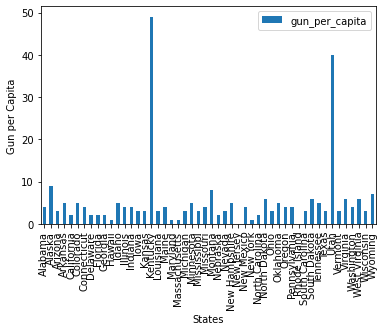

In [36]:
# plotting Gun per capital against states in 2010
_=combine_10.plot(x= 'state', y='gun_per_capita' ,kind='bar', xlabel= 'States', ylabel='Gun per Capita')

In [37]:
#sorting states using gun per capita in 2016
combine_16.sort_values(by='gun_per_capita', ascending=False)[['state','gun_per_capita']]

,state,gun_per_capita
16,Kentucky,82.0
12,Illinois,13.0
13,Indiana,13.0
0,Alabama,10.0
28,New Hampshire,10.0
47,West Virginia,9.0
41,Tennessee,9.0
40,South Dakota,9.0
1,Alaska,9.0
17,Louisiana,9.0


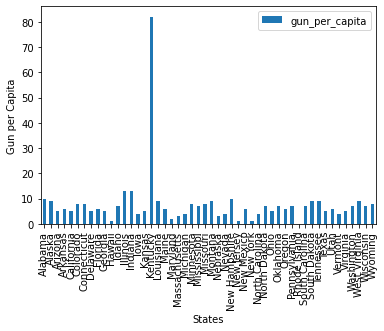

In [38]:
#plotting gun per capital against state in 2016
_=combine_16.plot(x= 'state', y='gun_per_capita' ,kind='bar', xlabel= 'States', ylabel='Gun per Capita')

# kentuky has the highest gun per capita in both 2010 and 2016
## List of states with highest gun per capita in 2010
    1.Kentucky
    2. Utah
    3. Alaska
    4. Montana
    5. Wyoming
    6. West Virginia
    7. Virginia
    8. South Dakota
    9. North Dakota
    10  Colorado
## List of states with highest gun per capita in 2016
    1. Kentucky
    2. Illinois
    3. Indiana
    4. Alabama
    5. New Hampshire
    6. West Virginia
    7. Tennessee
    8. South Dakota
    10. Louisiana

### Research Question 2  (Most type of gun purchase in 2005, 2010, 2016, and 2017)

#### 2017

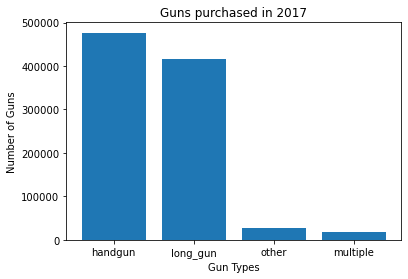

In [39]:
# height variable will store number of a particular gun type across all states
#xlabel will store the variable name

height = [gd_17.groupby('month').sum()[n][0] for n in gd_17.groupby('month').sum().columns[:4]]
xlabel = [gd_17.groupby('month').sum().columns[n] for n in range(4)]
plt.bar(xlabel, height)
plt.xlabel('Gun Types')
plt.title('Guns purchased in 2017')
_=plt.ylabel('Number of Guns')


#### 2016

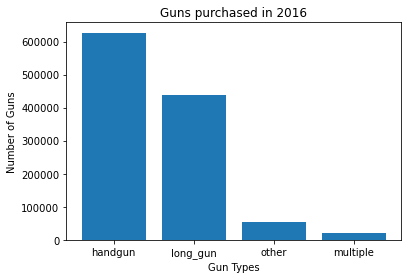

In [40]:
height = [gd_16.groupby('month').sum()[n][0] for n in gd_16.groupby('month').sum().columns[:4]]
xlabel = [gd_16.groupby('month').sum().columns[n] for n in range(4)]
plt.bar(xlabel, height)
plt.xlabel('Gun Types')
plt.title('Guns purchased in 2016')
_=plt.ylabel('Number of Guns')

#### 2010

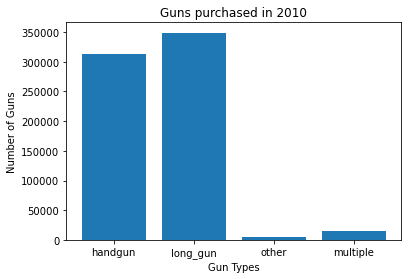

In [41]:
height = [gd_10.groupby('month').sum()[n][0] for n in gd_10.groupby('month').sum().columns[:4]]
xlabel = [gd_10.groupby('month').sum().columns[n] for n in range(4)]
plt.bar(xlabel, height)
plt.xlabel('Gun Types')
plt.title('Guns purchased in 2010')
_=plt.ylabel('Number of Guns')

#### 2005

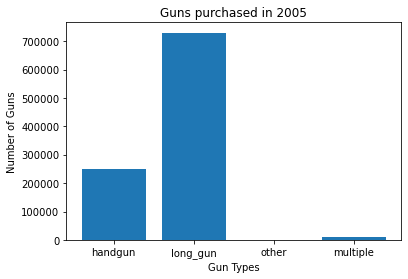

In [42]:
height = [gd_05.groupby('month').sum()[n][0] for n in gd_05.groupby('month').sum().columns[:4]]
xlabel = [gd_05.groupby('month').sum().columns[n] for n in range(4)]
plt.bar(xlabel, height)
plt.xlabel('Gun Types')
plt.title('Guns purchased in 2005')
_=plt.ylabel('Number of Guns')

<a id='conclusions'></a>
## Conclusions

> **One**: From the trend in gun purchase, Prior to 2016, long gun is the most purchased gun type, but handgun have overtaken it by 2016 onward.
> **Two**: The state of Kentucky has the highest gun per 1000 people from both years analyzed. Census data for each year -instead of the two given- would have helped to gradually see how gun per capita evolve over time
> **Three** There is increase in gun per capita in most states from 2010 to 2016

> **Limitation**: The total amount of guns provided might not accurate as there might be people who might have bought gun did not check it with the appropriate authority. Therefore, the results are only provisional.



In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295